# FODS Assignment 1

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## TASK 1 : DATA PREPROCESSING



1.   Loading Dataset into pandas dataframe
2.   Normalising features
3.   Shuffling dataset and splitting into training and testing set
4.   Visualising Dataset



In [221]:
df = pd.read_csv("Data.csv")  #change this to ./data.csv in ur jupyter notebook bois

In [222]:
df.head()

,X,Y
0,0.987988,5.098368
1,0.719720,2.516654
2,-0.403403,0.337961
3,0.107107,0.737320
4,0.345345,-0.780955


In [223]:
mean_y = df['Y'].mean()
std_y = df['Y'].std()

### Normalizing

In [224]:
df['Y'] = (df['Y'] - mean_y) / std_y

In [225]:
df.tail()

,X,Y
995,0.671672,1.174380
996,-0.615616,-0.512541
997,0.259259,0.062779
998,0.119119,-0.392207
999,0.369369,-0.226423


In [226]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
train_set, test_set = df[:800], df[800:]

In [227]:
print("Training Set:")
print(train_set)
print("\nTesting Set:")
print(test_set)

Training Set:
            X         Y
0   -0.851852 -1.119315
1   -0.853854 -2.033919
2    0.159159  0.660240
3   -0.617618 -0.348264
4   -0.219219  0.315293
..        ...       ...
795 -0.125125  0.023610
796  0.479479 -0.277378
797  0.243243 -0.154319
798 -0.437437  0.403846
799 -0.927928 -1.061514

[800 rows x 2 columns]

Testing Set:
            X         Y
800  0.673674  0.232092
801  0.595596 -0.103215
802  0.485485  1.248083
803 -0.765766 -1.053501
804  0.387387 -0.829054
..        ...       ...
995  0.333333  0.093957
996  0.423423  0.568719
997 -0.803804 -1.053091
998 -0.551552 -1.197638
999 -0.869870 -1.652367

[200 rows x 2 columns]


### Visualizing

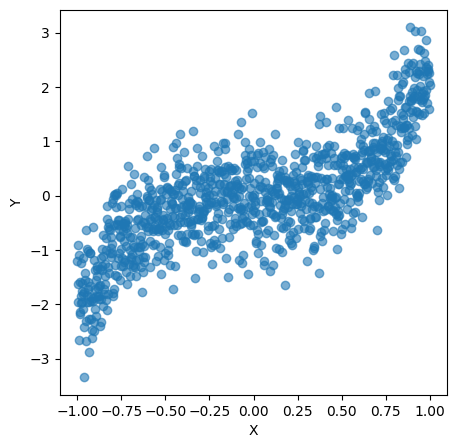

In [228]:
plt.figure(figsize=(5, 5))
scatter = plt.scatter(df['X'], df['Y'], alpha = 0.6)

plt.xlabel('X')
plt.ylabel('Y')

plt.show()

## Task 2: POLYNOMIAL REGRESSION AND REGULARIZATION

### POLYNOMIAL REGRESSION

### Pre-computing the polynomial values

In [229]:
def precompute_polynomials(df_train, max_degree):
    poly_values = np.zeros((len(df_train), max_degree + 1))
    for i in range(len(df_train)):
        for j in range(max_degree + 1):
            poly_values[i, j] = df_train['X'][i] ** j
    return poly_values

### error function (conceptualization)
 **delta E =  1/2(Σ (y(x,w) - ŷ)^2)**

In [230]:
def compute_error(df_train, w, poly_values):
    error = 0
    for i in range(len(df_train)):
        y = np.dot(w, poly_values[i])
        error += (y - df_train['Y'][i]) ** 2
    return error / 2


### gradient of cost function
**Σ(y_n)(x_n)^power for all points in a batch**

y_n is the residual error (estimated - predicted)

(x_n)^power is the inner derivative term for the partial derivative wrt that variable.

In [231]:
def gradient(df_train, w, poly_values, power, start, end):
    slope = 0
    for i in range(start, end + 1):
        y_n = np.dot(w, poly_values[i]) - df_train['Y'][i]
        slope += y_n * poly_values[i, power]
    return slope

Descent by updating weights A/c to batch and polynomial degree

In [232]:
poly_values = precompute_polynomials(train_set, 9)

In [233]:
def gradient_descent(df_train, w, poly_values, deg, start, end, gradient):
    w_old = w.copy()
    for i in range(deg + 1):
        w[i] -= 0.001 * gradient(df_train, w_old, poly_values, i, start, end)
    return w

### graphing error for degrees 1-9


1.   Iterating through the degrees and creating an appropriate weight array
2.   Performing 100 iterations for each batch(4)
3.  updating weights with gradient descent for each batch. Getting error with compute_error function
4.  making a error 2d matrix which stores errors for all iterations for all degrees
5.  plotting this error matrix using matplotlib



In [234]:
# # Rest of the code remains the same
# all_errors = {}
# batches = 4
# multiple = 200

# for deg in range(1, 10):
#     w = np.zeros(deg + 1)
#     errors = []

#     for itr in range(500):
#         for batch in range(batches):
#             w = gradient_descent(
#                 train_set,
#                 w,
#                 poly_values[:, :deg + 1],  # Use only up to the required degree
#                 deg,
#                 batch * multiple,
#                 (batch + 1) * multiple - 1,
#                 gradient
#             )

#         error = compute_error(train_set, w, poly_values[:, :deg + 1])
#         errors.append(error)

#     all_errors[deg] = errors

# plt.figure(figsize=(12, 8))
# for deg, errors in all_errors.items():
#     plt.plot(errors, label=f"Degree {deg}")

# plt.xlabel("Iterations")
# plt.ylabel("Error")
# plt.title("Error vs. Iterations for Polynomial Degrees 1 to 9")
# plt.legend()
# plt.show()

### REGULARISATION


Compute_error for L2

In [235]:
def compute_error_L2(df_train, w, deg,ln_lambda):
    error = 0
    norm_sq = 0
    for wi in range(deg+1):
      norm_sq += w[wi] * w[wi]

    for i in range(len(df_train)):
        y = 0
        for j in range(deg + 1):
            y += w[j] * (df_train['X'][i] ** j)
        error += (y - df_train['Y'][i]) ** 2

    error+= + (ln_lambda * norm_sq)

    return error / 2

Gradient for L2

In [236]:
def gradient_L2(df_train, w, deg, power, start, end, ln_lambda):

    slope = 0
    for i in range(start, end + 1):
        x = np.array([df_train['X'][i] ** j for j in range(deg + 1)])

        y_n = np.dot(w, x) - df_train['Y'][i]
        slope += y_n * (df_train['X'][i] ** power)

    slope += ln_lambda * w[power]

    return slope

descent for L2 with varying λ

In [237]:
def gradient_descent_L2(df_train, w, deg, start, end, gradient,ln_lambda):

    w_old = w.copy()
    for i in range(deg + 1):
        w[i] -= 0.0001 * gradient_L2(df_train, w_old, deg, i, start, end,ln_lambda)

    return w

###training models with different  λ values (0,1) (RISK OF PLAGUE) 15-20 min work to remove it

ALSO -> HARSHIT u have to use numpy(VECTORISED) features to make ur code run fast, i did on my own like you, but it kept running for 1 year. it gave result. but this gpt code is optimal.


 i guess all we have to do is remove functions and write sequential code similar to yours with different names and then pass on the poor developer story to gpt and then use zero gpt to remove any stupid shit



plot has to be improved ig (LOOKS CLUMSY)

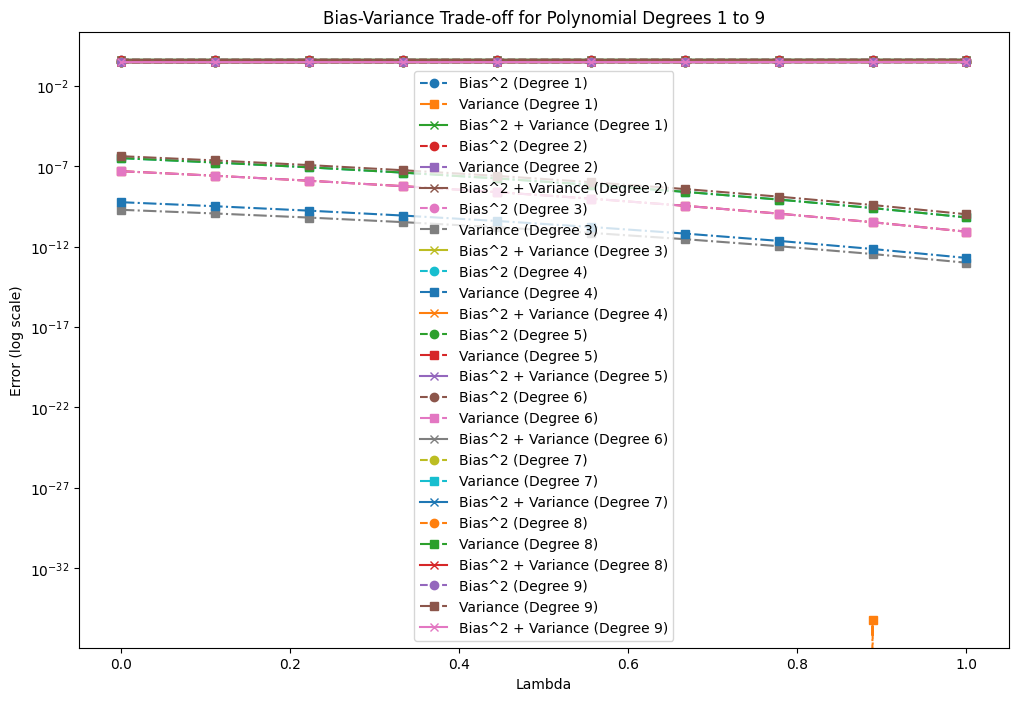

In [238]:
from math import exp
# Create the design matrix for polynomial features
def create_design_matrix(X, deg):
    return np.array([X ** i for i in range(deg + 1)]).T  # (N x deg+1)

# Gradient computation with L2 regularization (vectorized)
def gradient_L2_vectorized(X_batch, y_batch, w, ln_lambda):
    N = len(y_batch)
    predictions = np.dot(X_batch, w)
    errors = predictions - y_batch
    grad = np.dot(X_batch.T, errors)
    grad += exp(ln_lambda) * w  # L2 regularization term
    return grad

# Gradient descent for L2 regularization (vectorized)
def gradient_descent_L2_vectorized(X, y, w, ln_lambda, learning_rate=0.001, max_iter=500, batch_size=200):
    N = len(y)
    for itr in range(max_iter):
        for start in range(0, N, batch_size):
            end = min(start + batch_size, N)
            X_batch = X[start:end]
            y_batch = y[start:end]
            gradient = gradient_L2_vectorized(X_batch, y_batch, w, ln_lambda)
            w -= learning_rate * gradient
    return w

# Compute the error with L2 regularization (vectorized)
def compute_error_L2_vectorized(X, y, w, ln_lambda):
    predictions = np.dot(X, w)
    errors = predictions - y
    error = (1 / (2 * len(y))) * np.sum(errors ** 2)  # Mean squared error
    return error

# Function to calculate bias and variance
def calculate_bias_variance(df_train, degrees, lambdas, iterations=500, batches=4, batch_size=200):
    y_data = df_train['Y'].values
    all_bias = {}
    all_variance = {}
    all_total_error = {}

    for deg in degrees:
        X_design = create_design_matrix(train_set['X'], deg)  # Design matrix for current degree
        N = len(X_design)

        bias_values = []
        variance_values = []
        total_error_values = []

        for ln_lambda in lambdas:
            predictions_all_batches = np.zeros((batches, N))  # Pre-allocate predictions

            # Train on multiple batches
            w = np.zeros(deg + 1)
            for batch in range(batches):
                w = gradient_descent_L2_vectorized(X_design, y_data, w, ln_lambda, max_iter=iterations, batch_size=batch_size)

                # Store predictions for this batch
                predictions_all_batches[batch] = np.dot(X_design, w)

            # Compute mean prediction (for bias calculation)
            mean_predictions = np.mean(predictions_all_batches, axis=0)

            # Bias = Average squared difference between mean prediction and actual value
            bias = np.mean((mean_predictions - y_data) ** 2)
            bias_values.append(bias)

            # Variance = Average of squared differences between individual predictions and mean prediction
            variance = np.mean(np.var(predictions_all_batches, axis=0))
            variance_values.append(variance)

            # Total error = Bias + Variance
            total_error = bias + variance
            total_error_values.append(total_error)

        all_bias[deg] = bias_values
        all_variance[deg] = variance_values
        all_total_error[deg] = total_error_values

    return all_bias, all_variance, all_total_error

# Plotting the Bias^2, Variance, and Total Error
def plot_bias_variance(all_bias, all_variance, all_total_error, degrees, lambdas):
    plt.figure(figsize=(12, 8))

    for deg in degrees:
        plt.plot(lambdas, all_bias[deg], label=f"Bias^2 (Degree {deg})", linestyle='--', marker='o')
        plt.plot(lambdas, all_variance[deg], label=f"Variance (Degree {deg})", linestyle='-.', marker='s')
        plt.plot(lambdas, all_total_error[deg], label=f"Bias^2 + Variance (Degree {deg})", linestyle='-', marker='x')

    plt.yscale('log')  # Use log scale for better visibility
    plt.xlabel("Lambda")
    plt.ylabel("Error (log scale)")
    plt.title("Bias-Variance Trade-off for Polynomial Degrees 1 to 9")
    plt.legend()
    plt.show()

# Define the degrees and lambda values to test
degrees = range(1, 10)  # Degrees from 1 to 9
lambdas = np.linspace(0, 1, 10)  # Use a few distinct values of lambda

# Calculate bias, variance, and total error for different degrees and lambdas
all_bias, all_variance, all_total_error = calculate_bias_variance(train_set, degrees, lambdas, iterations=500, batch_size=200)

# Plot the results
plot_bias_variance(all_bias, all_variance, all_total_error, degrees, lambdas)


##TASK 3: PLOTTING

PLOT 1

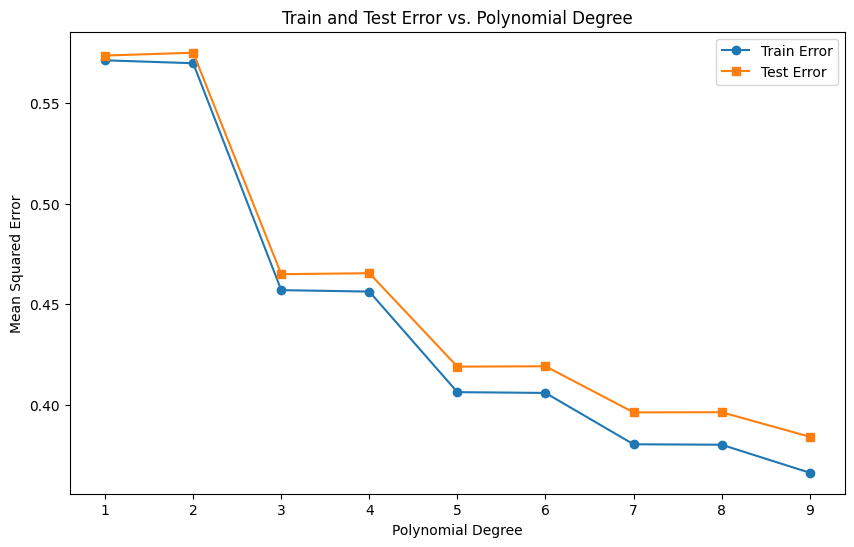

In [239]:
import numpy as np
import matplotlib.pyplot as plt

# Create the design matrix for polynomial features
def create_design_matrix(X, deg):
    return np.array([X ** i for i in range(deg + 1)]).T  # (N x deg+1)

# Gradient descent for L2 regularization (vectorized)
def gradient_descent_L2_vectorized(X, y, w, ln_lambda, learning_rate=0.001, max_iter=500, batch_size=200):
    N = len(y)
    for itr in range(max_iter):
        for start in range(0, N, batch_size):
            end = min(start + batch_size, N)
            X_batch = X[start:end]
            y_batch = y[start:end]
            predictions = np.dot(X_batch, w)
            errors = predictions - y_batch
            grad = (1 / len(y_batch)) * np.dot(X_batch.T, errors) + ln_lambda * w
            w -= learning_rate * grad
    return w

# Compute the error with L2 regularization (vectorized)
def compute_error_L2_vectorized(X, y, w):
    predictions = np.dot(X, w)
    errors = predictions - y
    return np.mean(errors ** 2)  # Mean squared error

# Plot 1: Train and Test Error vs. Polynomial Degree
degrees = range(1, 10)
train_errors = []
test_errors = []

for deg in degrees:
    # Create the design matrix for train and test sets
    X_train_design = create_design_matrix(train_set['X'].values, deg)
    X_test_design = create_design_matrix(test_set['X'].values, deg)

    y_train = train_set['Y'].values
    y_test = test_set['Y'].values

    # Initialize weights
    w = np.zeros(deg + 1)

    # Train the model using gradient descent
    w = gradient_descent_L2_vectorized(X_train_design, y_train, w, ln_lambda=0.01, max_iter=500)

    # Compute training and test errors
    train_error = compute_error_L2_vectorized(X_train_design, y_train, w)
    test_error = compute_error_L2_vectorized(X_test_design, y_test, w)

    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot train and test errors
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Train Error', marker='o')
plt.plot(degrees, test_errors, label='Test Error', marker='s')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Train and Test Error vs. Polynomial Degree')
plt.legend()
plt.show()


PLOT 2

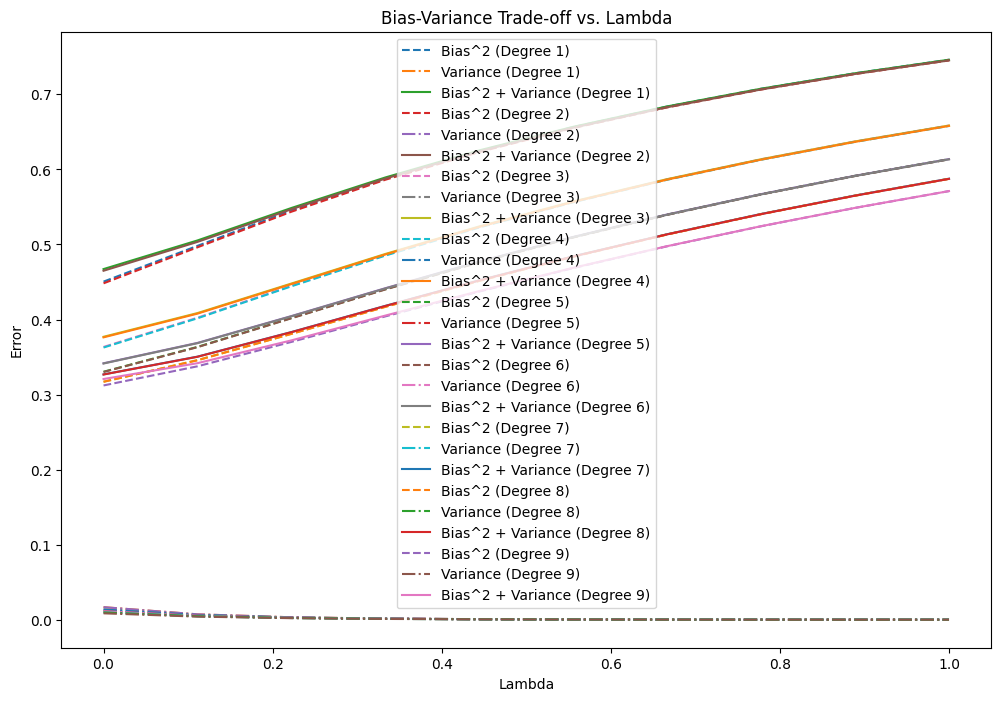

In [240]:
# Using previously written function for calculating bias, variance and total error
degrees = range(1, 10)
lambdas = np.linspace(0, 1, 10)

# Use the same calculate_bias_variance function you implemented earlier

# Calculate bias, variance, and total error for different degrees and lambdas
all_bias, all_variance, all_total_error = calculate_bias_variance(train_set, degrees, lambdas)

# Plot bias, variance, and total error
plt.figure(figsize=(12, 8))
for deg in degrees:
    plt.plot(lambdas, all_bias[deg], label=f"Bias^2 (Degree {deg})", linestyle='--')
    plt.plot(lambdas, all_variance[deg], label=f"Variance (Degree {deg})", linestyle='-.')
    plt.plot(lambdas, all_total_error[deg], label=f"Bias^2 + Variance (Degree {deg})", linestyle='-')

plt.xlabel("Lambda")
plt.ylabel("Error")
plt.title("Bias-Variance Trade-off vs. Lambda")
plt.legend()
plt.show()


PLOT 3

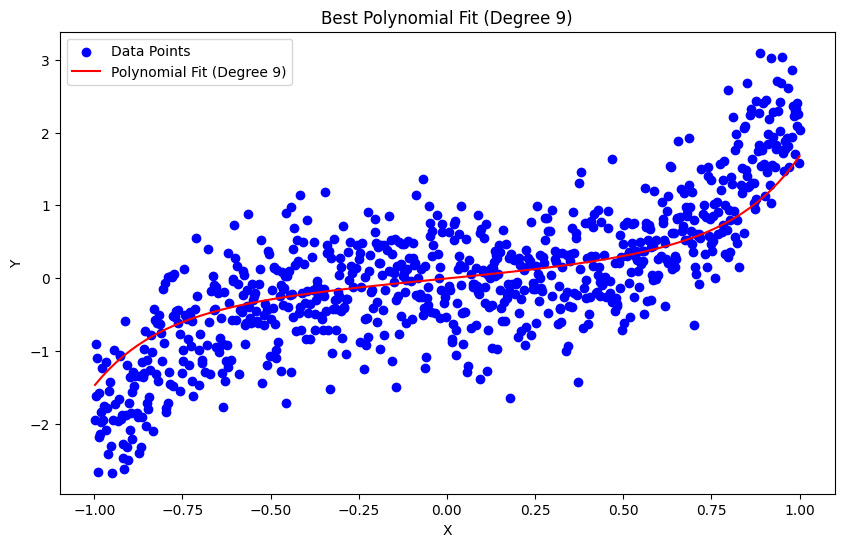

In [241]:
# Plot 3: Best Polynomial Fit on Data Points
best_deg = degrees[np.argmin(test_errors)]  # Get degree with lowest test error

# Create design matrix for best degree
X_train_design_best = create_design_matrix(train_set['X'].values, best_deg)
y_train = train_set['Y'].values

# Train the model using the best degree
w_best = np.zeros(best_deg + 1)
w_best = gradient_descent_L2_vectorized(X_train_design_best, y_train, w_best, ln_lambda=0.01, max_iter=500)

# Generate predictions using the best polynomial degree
X_plot = np.linspace(min(train_set['X'].values), max(train_set['X'].values), 100)
X_plot_design = create_design_matrix(X_plot, best_deg)
y_plot = np.dot(X_plot_design, w_best)

# Plot the data points and the best polynomial fit
plt.figure(figsize=(10, 6))
plt.scatter(train_set['X'], train_set['Y'], color='blue', label='Data Points')
plt.plot(X_plot, y_plot, color='red', label=f'Polynomial Fit (Degree {best_deg})')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Best Polynomial Fit (Degree {best_deg})')
plt.legend()
plt.show()


PLOT 4

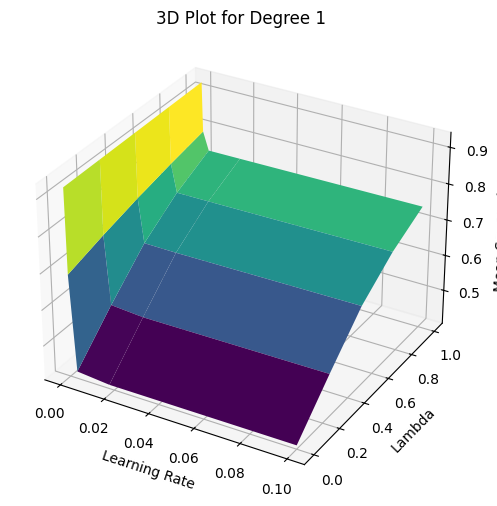

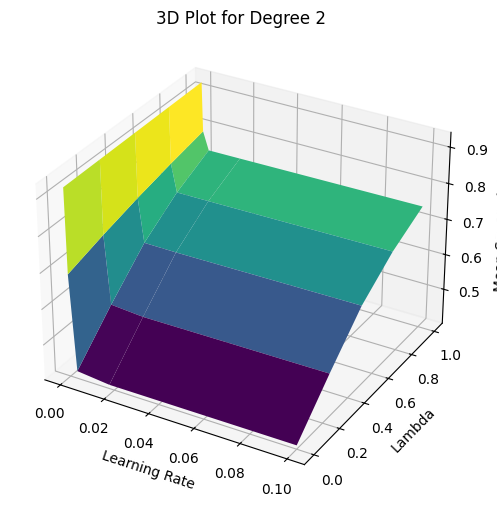

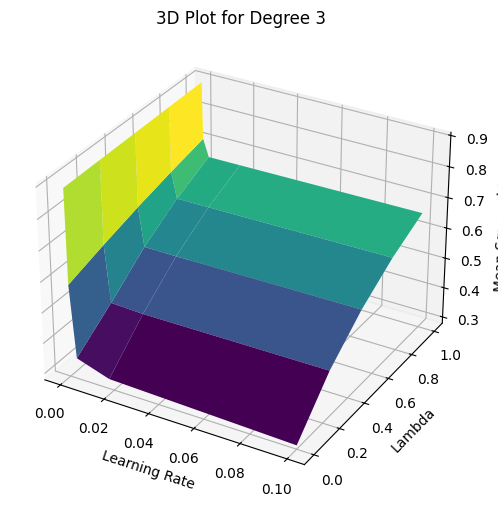

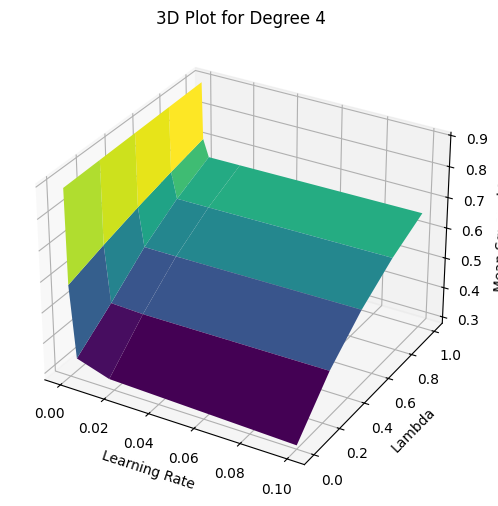

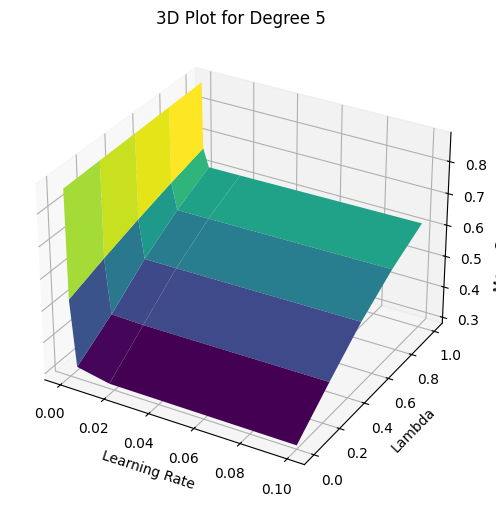

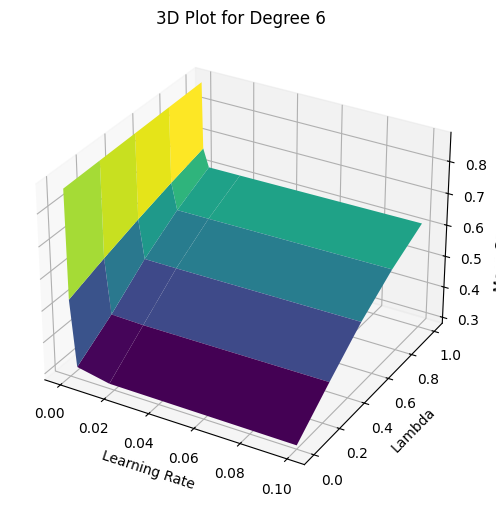

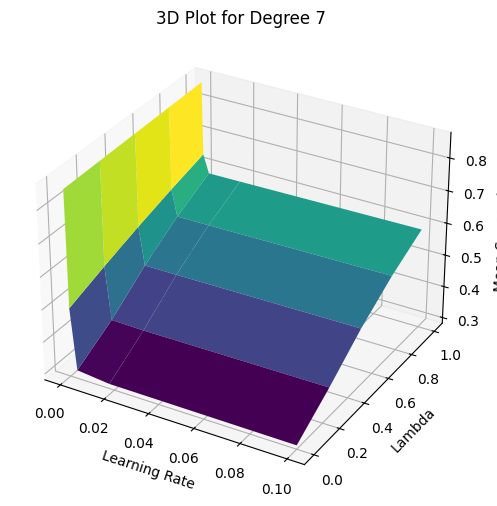

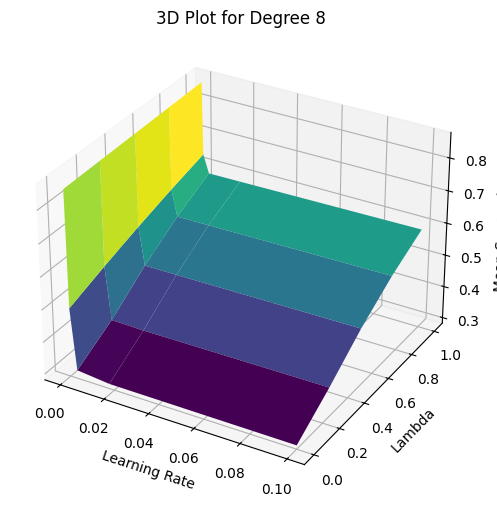

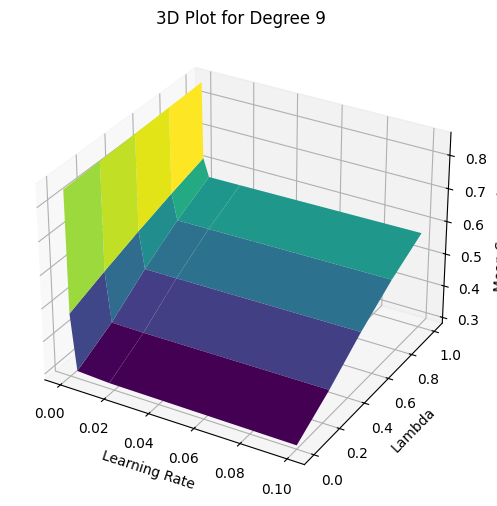

In [242]:
from mpl_toolkits.mplot3d import Axes3D

# Define learning rates and lambdas to test
learning_rates = np.logspace(-4, -1, 5)  # Test 5 different learning rates
lambdas = np.linspace(0, 1, 5)           # Test 5 different values for lambda

# Store MSE for each combination of learning rate, lambda, and degree
mse_results = np.zeros((len(degrees), len(learning_rates), len(lambdas)))

# 3D Plot
for i, deg in enumerate(degrees):
    X_train_design = create_design_matrix(train_set['X'].values, deg)
    y_train = train_set['Y'].values

    for j, lr in enumerate(learning_rates):
        for k, ln_lambda in enumerate(lambdas):
            w = np.zeros(deg + 1)
            w = gradient_descent_L2_vectorized(X_train_design, y_train, w, ln_lambda, learning_rate=lr, max_iter=500)
            mse_results[i, j, k] = compute_error_L2_vectorized(X_train_design, y_train, w)

# Plotting the 3D graph for each degree
for i, deg in enumerate(degrees):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    lr_mesh, lambda_mesh = np.meshgrid(learning_rates, lambdas)
    mse_mesh = mse_results[i]

    ax.plot_surface(lr_mesh, lambda_mesh, mse_mesh.T, cmap='viridis')
    ax.set_xlabel('Learning Rate')
    ax.set_ylabel('Lambda')
    ax.set_zlabel('Mean Squared Error')
    ax.set_title(f'3D Plot for Degree {deg}')
    plt.show()
